# Popular Data Science Questions On Stack Exchange

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Popular-Data-Science-Questions-On-Stack-Exchange" data-toc-modified-id="Popular-Data-Science-Questions-On-Stack-Exchange-1">Popular Data Science Questions On Stack Exchange</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1">Introduction</a></span><ul class="toc-item"><li><span><a href="#Results" data-toc-modified-id="Results-1.1.1">Results</a></span></li></ul></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-1.2">Data Exploration</a></span></li><li><span><a href="#Data-Clean-Up" data-toc-modified-id="Data-Clean-Up-1.3">Data Clean-Up</a></span><ul class="toc-item"><li><span><a href="#FavoriteCount" data-toc-modified-id="FavoriteCount-1.3.1">FavoriteCount</a></span></li><li><span><a href="#CreationDate" data-toc-modified-id="CreationDate-1.3.2">CreationDate</a></span></li><li><span><a href="#Tags" data-toc-modified-id="Tags-1.3.3">Tags</a></span></li></ul></li><li><span><a href="#Determining-Most-Popular-Tags" data-toc-modified-id="Determining-Most-Popular-Tags-1.4">Determining Most Popular Tags</a></span><ul class="toc-item"><li><span><a href="#Popularity-Marker-Overlap" data-toc-modified-id="Popularity-Marker-Overlap-1.4.1">Popularity Marker Overlap</a></span></li></ul></li><li><span><a href="#All-Popularity-Metrics-and-Visualization" data-toc-modified-id="All-Popularity-Metrics-and-Visualization-1.5">All Popularity Metrics and Visualization</a></span></li><li><span><a href="#Highly-Engaging-and-Highly-Popular" data-toc-modified-id="Highly-Engaging-and-Highly-Popular-1.6">Highly Engaging and Highly Popular</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.7">Conclusion</a></span></li></ul></li></ul></div>

## Introduction

In this project we will be working with data from [Stack Exchange](https://en.wikipedia.org/wiki/Stack_Exchange), a question-answer forum focused on programming related topics. Our task is to determine the best content to write posts about within the realm of Data Science. Stack Exchange has a [Data Science focused microsite](https://datascience.stackexchange.com/) that we will help us focus our analysis. 

Stack Exchange makes its data publicly available via the Stack Exchange Data Explorer ([SEDE](https://data.stackexchange.com/datascience/query/new)), which allows SQL queries of its database and exportation to .csv files. We will be analyzing a .csv file containing data from Posts database over the year 2019.

### Results
Our recommendation is to focus on the **highly popular and highly engaging** tags to start. We have provided a shortlist of 9 tags that meet both criteria.

**Overlapping tags should be prioritized** where relevant. i.e. an article on machine learning using python, pandas and scikit learn has 3 of the 9 most popular and highly engaging tags and all three should be used.

**Niche, or less talked about, content can perform just as well** if not better than those that are popular topics. As the content team needs topics beyond the top 9 listed above, we recommend experimenting with more niche, lower visibility but more engagedwith tags to see how they compare. An expanded overlap list can be provided upon request.

## Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in the dataframe
data = pd.read_csv('2019_questions.csv')

In [3]:
# show a sample of the data available
data.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


In [4]:
# total rows and columns in the dataframe
data.shape

(8839, 7)

In [5]:
# high level stats for the columns
data.describe()

,Id,Score,ViewCount,AnswerCount,FavoriteCount
count,8839.000000,8839.000000,8839.000000,8839.000000,1407.000000
mean,54724.172870,0.870687,171.548026,0.787985,1.184790
std,6507.618509,1.410255,772.813626,0.851146,0.982766
min,43363.000000,-2.000000,2.000000,0.000000,0.000000
25%,48917.500000,0.000000,22.000000,0.000000,1.000000
50%,54833.000000,1.000000,40.000000,1.000000,1.000000
75%,60674.500000,1.000000,98.000000,1.000000,1.000000
max,65675.000000,45.000000,33203.000000,9.000000,16.000000


In [6]:
# completeness and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             8839 non-null   int64  
 1   CreationDate   8839 non-null   object 
 2   Score          8839 non-null   int64  
 3   ViewCount      8839 non-null   int64  
 4   Tags           8839 non-null   object 
 5   AnswerCount    8839 non-null   int64  
 6   FavoriteCount  1407 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 483.5+ KB


We have 7 columns of datapoints and 8839 rows of data entries. The data is comprised of integer, string object, and float types. There is a high degree of completeness to the data - the exception being the __Favorite__ count column, which only has 1407 non-null values. 

From their website we know that each column roughly means the following:
* __Id__: An identification number for the post.
* __CreationDate__: The date and time of creation of the post.
* __Score__: The post's score.
* __ViewCount__: How many times the post was viewed.
* __Tags__: What tags were used.
* __AnswerCount__: How many answers the question got (only applicable to question posts).
* __FavoriteCount__: How many times the question was favored (only applicable to question posts).

The __Tags__ column will be critical for our analysis, as it tells us subjectively what each post is about. We will have to find a way to parse out the tags for each post, of which there can be none or several. 

The __Score__, __ViewCount__, __AnswerCount__, and __FavoriteCount__ columns will give us engagement metrics.

The __CreationDate__ column will give us a sense of any seasonality.

## Data Clean-Up

### FavoriteCount

Let's start with an evaluation of our FavoriteCount column, which had an extensive presence of np.NaN values. The FavoriteCount is one vector we can use measure popularity for posts and topics.

In [7]:
# create a frequency table of values
data['FavoriteCount'].value_counts(dropna=False).sort_index(ascending=False)

16.0       1
11.0       1
8.0        1
7.0        4
6.0        4
5.0        8
4.0       12
3.0       43
2.0      205
1.0      953
0.0      175
NaN     7432
Name: FavoriteCount, dtype: int64

It is a safe assumption that the np.NaN values are equivalent to zero values. Knowing which types of posts had no favorites is still useful information for analysis and we should include them. Let's fill those in now so they are consistent.

In [8]:
# replace NaN with zeros and convert to integer
data['FavoriteCount'] = data['FavoriteCount'].fillna(0).astype(int)

In [9]:
# check the changes
data['FavoriteCount'].value_counts(dropna=False).sort_index(ascending=False)

16       1
11       1
8        1
7        4
6        4
5        8
4       12
3       43
2      205
1      953
0     7607
Name: FavoriteCount, dtype: int64

### CreationDate

Our __CreationDate__ column needs to be converted to DateTime format. DateTime is a useful format for dates to be in as it allows easy parsing of and passing of arguments to date objects. __CreationDate__ may be useful for determing if there is seasonality to tags over time. 

In [10]:
# show the current format is string 
data['CreationDate'].max()

'2019-12-31 20:18:32'

In [11]:
# convert to datetime
data['CreationDate'] = pd.to_datetime(data['CreationDate'])

# confirm change
data['CreationDate'].max()

Timestamp('2019-12-31 20:18:32')

### Tags

__Tags__ are the qualitative, nominal values that will tell us what posts are actually about, being able to parse and combine tags across rows will be a key step in our analytics process. We will change from \<tag\> to comma separated values so we can convert these to lists.

In [12]:
data['Tags'].head()

0                      <machine-learning><data-mining>
1    <machine-learning><regression><linear-regressi...
2         <python><time-series><forecast><forecasting>
3                <machine-learning><scikit-learn><pca>
4             <dataset><bigdata><data><speech-to-text>
Name: Tags, dtype: object

In [13]:
# use pandas string methods to turn these into lists
data['Tags'] = data['Tags'].str.replace('<','').str.replace('>',',')

#confirm changes
data['Tags'].head()

0                        machine-learning,data-mining,
1    machine-learning,regression,linear-regression,...
2             python,time-series,forecast,forecasting,
3                   machine-learning,scikit-learn,pca,
4                 dataset,bigdata,data,speech-to-text,
Name: Tags, dtype: object

Pandas dataframes can accept lists as cell datatypes. Let's convert the tag values to a actual lists. This will allow us to use Python list methods to loop through, slice, or select datapoints more easily from our lists.

In [14]:
# turn the strings into a list
def split_string(string):
    ls = string.split(',')
    return ls
data['Tags'] = data['Tags'].apply(split_string)
data['Tags'].head()

0                    [machine-learning, data-mining, ]
1    [machine-learning, regression, linear-regressi...
2       [python, time-series, forecast, forecasting, ]
3              [machine-learning, scikit-learn, pca, ]
4           [dataset, bigdata, data, speech-to-text, ]
Name: Tags, dtype: object

## Determining Most Popular Tags

First we will focus on the frequency of occurence of a tag being associated with a post. Then we will attach engagement metrics to the tags.

In [15]:
# create empty dictionary
tag_count = {}
# loop through the rows in each series then loop through the list in tags and create a frequency table dictionary
for tag_list in data['Tags']:
    for tag in tag_list:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1
            
# turn the dictionary into a dataframe
tags = pd.DataFrame(list(tag_count.items()), columns = ['tag','count'])

# show the top values 
tags.sort_values('count',ascending=False).head()

,tag,count
2,,8839
0,machine-learning,2693
6,python,1814
22,deep-learning,1220
40,neural-network,1055


In [16]:
# turn posts with no tags to np.NaN
tags.iloc[2:3,0:1] = np.NaN

# filter top 20 values
top20_tags_frequency = tags.sort_values('count',ascending=False).head(20)

#show series
top20_tags_frequency

,tag,count
2,NaN,8839
0,machine-learning,2693
6,python,1814
22,deep-learning,1220
40,neural-network,1055
23,keras,935
58,classification,685
46,tensorflow,584
10,scikit-learn,540
27,nlp,493


Let's now do the same with views.

In [17]:
# create empty dictionary
tag_views = {}

# iterrows allows us to loop through each row in a dataframe
for index, row in data.iterrows():
    # loop through the list of each row
    for tag in row['Tags']:
        # check if the tag is in the dictionary and add the values
        if tag in tag_views:
            tag_views[tag] += row['ViewCount']
        else:
            tag_views[tag] = row['ViewCount']
            
# turn the dictionary into a dataframe
tag_tot_views = pd.DataFrame(list(tag_views.items()), columns = ['tag','views'])

# turn the empty tag to np.nan
tag_tot_views.loc[tag_tot_views['tag'] == '', 'tag'] = np.nan

# filter top 20 tags based on views
top20_tags_views = tag_tot_views.sort_values(by = 'views',ascending = False).head(20)
top20_tags_views

,tag,views
2,NaN,1516313
6,python,537585
0,machine-learning,388499
23,keras,268608
22,deep-learning,233628
32,pandas,201787
40,neural-network,185367
10,scikit-learn,128110
46,tensorflow,121369
58,classification,104457


We will now create a visualization comparing the top values in each of these dataframes.

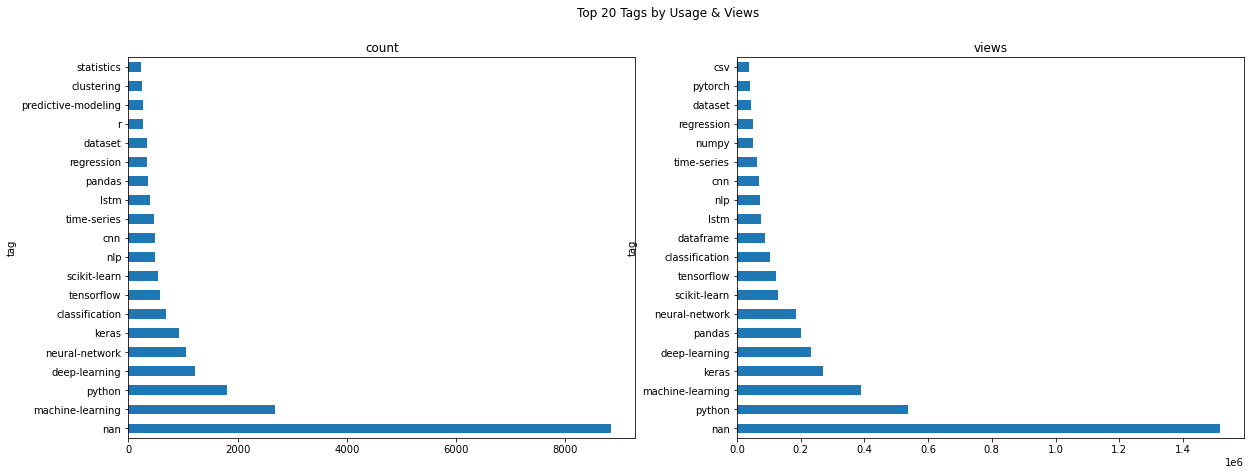

In [18]:
# define the format we want the subplots to follow
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,7))
# plot the two dataframes
top20_tags_frequency.plot(kind = 'barh', x = 'tag', y = 'count', ax = axes[0], subplots = True, legend = False, title = 'Top 20 Tags by Usage & Views')
top20_tags_views.plot(kind = 'barh', x = 'tag', y = 'views', ax = axes[1], legend = False, subplots = True, sharey = False)
plt.show()

### Popularity Marker Overlap

It will be useful indicator of popularity for us to know which tags are present in both the top 20 usage count and view count dataframes. Let's combine our dataframes to see which are in both and how they rank.

In [19]:
# merge dataframes as described
views_in_usage_count = pd.merge(left = top20_tags_frequency, right = top20_tags_views, how = 'left', left_on = 'tag', right_on = 'tag' )
usage_count_in_views = pd.merge(left = top20_tags_views, right = top20_tags_frequency, how = 'left', left_on = 'tag', right_on = 'tag')

In [20]:
print(views_in_usage_count)

                    tag  count      views
0                   NaN   8839  1516313.0
1      machine-learning   2693   388499.0
2                python   1814   537585.0
3         deep-learning   1220   233628.0
4        neural-network   1055   185367.0
5                 keras    935   268608.0
6        classification    685   104457.0
7            tensorflow    584   121369.0
8          scikit-learn    540   128110.0
9                   nlp    493    71382.0
10                  cnn    489    70349.0
11          time-series    466    64134.0
12                 lstm    402    74458.0
13               pandas    354   201787.0
14           regression    347    49451.0
15              dataset    340    43151.0
16                    r    268        NaN
17  predictive-modeling    265        NaN
18           clustering    257        NaN
19           statistics    234        NaN


In [21]:
print(usage_count_in_views)

                 tag    views   count
0                NaN  1516313  8839.0
1             python   537585  1814.0
2   machine-learning   388499  2693.0
3              keras   268608   935.0
4      deep-learning   233628  1220.0
5             pandas   201787   354.0
6     neural-network   185367  1055.0
7       scikit-learn   128110   540.0
8         tensorflow   121369   584.0
9     classification   104457   685.0
10         dataframe    89352     NaN
11              lstm    74458   402.0
12               nlp    71382   493.0
13               cnn    70349   489.0
14       time-series    64134   466.0
15             numpy    49767     NaN
16        regression    49451   347.0
17           dataset    43151   340.0
18           pytorch    40240     NaN
19               csv    38654     NaN


The tags in Top 20 usage count but not in Top 20 views are:
* r
* predictive modeling
* clustering
* statistics

The tags in Top 20 views but not in Top 20 usage count are:
* dataframe
* numpy
* pytorch
* csv

Let's expand this by taking the column names in both lists and creating

With our knowledge of the datascience domain, we can see that there is overlap between subject matter. For example, certain keywords are relevant to a specific programming language; [pandas](https://pandas.pydata.org/), [sci-kit learn](https://scikit-learn.org/stable/), [numpy](https://numpy.org/about/), and [pytorch](https://pytorch.org/) are all [libraries](https://www.mygreatlearning.com/blog/open-source-python-libraries/) of the [Python](https://www.python.org/doc/essays/blurb/) programming language. Therefore, when posts are made about these libraries there, the python tag is typically also used, allowing us to double dip on popular related tags.

## All Popularity Metrics and Visualization

Let's dive deeper and create a dataframe that contains the top 10 from each category. From there we will normalize these datasets and create a visualization.

In [22]:
# combine dataframes usage and view df
combined_metric_df = pd.merge(left = tags, right = tag_tot_views, how = 'inner', left_on = 'tag', right_on = 'tag')

The columns we need to pull into our new dataframe are:  
* Score  
* AnwserCount  
* FavoriteCount

In [23]:
# create a df for score for Score, AnswerCount, FavoriteCount
# create empty dictionary
tag_score = {}
tag_ac = {}
tag_fc = {}

# iterrows allows us to loop through each row in a dataframe
def tag_pop_met(metric_name):
    tag_metric_total = {}
    for index, row in data.iterrows():
        # loop through the list of each row
        for tag in row['Tags']:
            # check if the tag is in the dictionary and add the values
            if tag in tag_metric_total:
                tag_metric_total[tag] += row[metric_name]
            else:
                tag_metric_total[tag] = row[metric_name]
    # convert to a dataframe
    dataframe = pd.DataFrame(list(tag_metric_total.items()), columns = ['tag',metric_name])
    return dataframe

# use the function to create a df for each metric
tag_score = tag_pop_met('Score')
tag_ac = tag_pop_met('AnswerCount')
tag_fc = tag_pop_met('FavoriteCount')

# join all the dataframes 
combined_metric_df = pd.merge(left = combined_metric_df, right = tag_score, how = 'inner', left_on = 'tag', right_on = 'tag')
combined_metric_df = pd.merge(left = combined_metric_df, right = tag_ac, how = 'inner', left_on = 'tag', right_on = 'tag')
combined_metric_df = pd.merge(left = combined_metric_df, right = tag_fc, how = 'inner', left_on = 'tag', right_on = 'tag')

# display the result
combined_metric_df

,tag,count,views,Score,AnswerCount,FavoriteCount
0,machine-learning,2693,388499,2515,2313,575
1,data-mining,217,31056,186,183,31
2,regression,347,49451,277,309,47
3,linear-regression,175,18978,160,202,38
4,regularization,50,4941,52,39,5
...,...,...,...,...,...,...
521,encoder,1,16,1,1,0
522,label-smoothing,1,480,0,1,1
523,label-flipping,1,480,0,1,1
524,3d-object-detection,1,7,0,0,0


We now have a dataframe with each popularity metric summed values for each tag. There are a lot of tags, however, and we are really interested in the top values for each of these metrics. Let's take the top 20 of each, combine the tags from each so we have the best performing tags from each regardless of how they perform across the others.

In [24]:
# create an empty dictionary to lists of top values for each metric
top_tag_names = []
# create a list to use as reference in for loop
metrics = ['count', 'views', 'Score','AnswerCount','FavoriteCount']
#loop through each metric
for metric in metrics:
    # take the top 20 tag names of that metric as a list from the combined dataframe
    top20tags = list(combined_metric_df.sort_values(by =[metric], ascending = False).head(20)['tag'])
    # append the list to the top tag names list
    top_tag_names.append(top20tags)

    
# create an empty list to store unique names
unique_top_tags = []
# loop over each list in the tag names list
for ls in top_tag_names:
    # loop over each tag in each list
    for tag in ls:
        # append the tag to unique tag names list if not in list
        if tag not in unique_top_tags:
            unique_top_tags.append(tag)
            
# show the total count of top tags
print(len(unique_top_tags))

# show the unique tag values
unique_top_tags

30


['machine-learning',
 'python',
 'deep-learning',
 'neural-network',
 'keras',
 'classification',
 'tensorflow',
 'scikit-learn',
 'nlp',
 'cnn',
 'time-series',
 'lstm',
 'pandas',
 'regression',
 'dataset',
 'r',
 'predictive-modeling',
 'clustering',
 'statistics',
 'machine-learning-model',
 'dataframe',
 'numpy',
 'pytorch',
 'csv',
 'image-classification',
 'feature-selection',
 'data-mining',
 'linear-regression',
 'feature-engineering',
 'xgboost']

In [25]:
# create a filtered dataframe that only contains tag names in our list but every metric is included
top_combined_df = combined_metric_df[combined_metric_df['tag'].isin(unique_top_tags)]

print(top_combined_df)

                        tag  count   views  Score  AnswerCount  FavoriteCount
0          machine-learning   2693  388499   2515         2313            575
1               data-mining    217   31056    186          183             31
2                regression    347   49451    277          309             47
3         linear-regression    175   18978    160          202             38
5                    python   1814  537585   1475         1507            325
6               time-series    466   64134    375          303             97
9              scikit-learn    540  128110    507          518            113
11                  dataset    340   43151    235          295             54
21            deep-learning   1220  233628   1127          877            266
22                    keras    935  268608    785          654            181
23                      cnn    489   70349    452          362            100
26                      nlp    493   71382    455          369  

Our values have a wide range and unequal weight. Any graph we create will be difficult to interpret. Let's normalize our list of values so we can more easily compare them.

In [26]:
# create an empty dataframe that we will then add our normalized values 
normalized_top_tags = top_combined_df.copy()
normalized_top_tags = normalized_top_tags.iloc[:,:1]

print(normalized_top_tags)

                        tag
0          machine-learning
1               data-mining
2                regression
3         linear-regression
5                    python
6               time-series
9              scikit-learn
11                  dataset
21            deep-learning
22                    keras
23                      cnn
26                      nlp
27               clustering
31                   pandas
32                    numpy
39           neural-network
40     image-classification
41                        r
43      predictive-modeling
44                     lstm
45               tensorflow
54   machine-learning-model
55                  xgboost
57           classification
61               statistics
83                  pytorch
86                dataframe
88      feature-engineering
100       feature-selection
149                     csv


In [27]:
# list of columns we will be normalizing
metrics = list(top_combined_df.columns[1:])

# function we will use to normalize the values based on the min max of the complete series but applied to our top series
def norm(val, metric_name):
    metric_max = combined_metric_df[metric].max()
    metric_min = combined_metric_df[metric].min()
    
    norm_val = (val - metric_min)/(metric_max - metric_min)
    
    return norm_val

# apply the function to each of the 
for metric in metrics:
    series = top_combined_df[metric].apply(norm, metric_name=metric)
    normalized_top_tags[metric] = series

normalized_top_tags

,tag,count,views,Score,AnswerCount,FavoriteCount
0,machine-learning,1.000000,0.722672,1.000000,1.000000,1.000000
1,data-mining,0.080238,0.057762,0.074324,0.079118,0.053913
2,regression,0.128529,0.091981,0.110493,0.133593,0.081739
3,linear-regression,0.064636,0.035295,0.063990,0.087332,0.066087
5,python,0.673477,1.000000,0.586645,0.651535,0.565217
6,time-series,0.172734,0.119294,0.149444,0.130999,0.168696
9,scikit-learn,0.200223,0.238301,0.201908,0.223952,0.196522
11,dataset,0.125929,0.080261,0.093800,0.127540,0.093913
21,deep-learning,0.452823,0.434584,0.448331,0.379161,0.462609
22,keras,0.346954,0.499653,0.312401,0.282750,0.314783


In [28]:
# transform the dataframe so all variables are in one column
top_melted =   pd.melt(
                       normalized_top_tags, 
                       id_vars=['tag'], 
                       value_vars=metrics
                       )
top_melted

,tag,variable,value
0,machine-learning,count,1.000000
1,data-mining,count,0.080238
2,regression,count,0.128529
3,linear-regression,count,0.064636
4,python,count,0.673477
...,...,...,...
145,pytorch,FavoriteCount,0.059130
146,dataframe,FavoriteCount,0.017391
147,feature-engineering,FavoriteCount,0.081739
148,feature-selection,FavoriteCount,0.088696


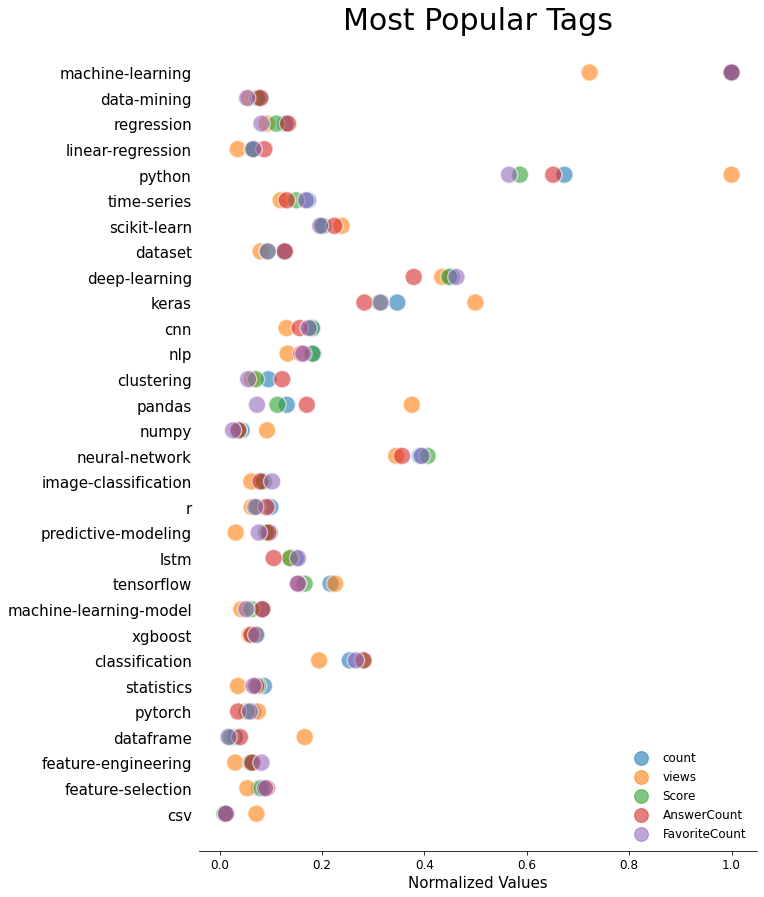

In [29]:
# create a plot
fig, ax = plt.subplots(figsize = (10,15))
ax = sns.scatterplot(
                     data = top_melted,
                     x = 'value',
                     y = 'tag',
                     hue = 'variable',
                     s = 300,
                     alpha = 0.6
                     )

ax.set_title('Most Popular Tags', fontsize = 30)
ax.set_xlabel('Normalized Values', fontsize = 15)
ax.set_ylabel(None)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 15)
ax.tick_params(left = False)

leg = ax.legend(loc = 4, fontsize = 12, frameon = False, markerscale = 2.3)
#set alpha of legend
for lh in leg.legendHandles: 
    lh.set_alpha(0.6)

sns.despine(left=True)
plt.show()

Of the top 30 tags, most hover around 10% performance across the normalized spectrum. Additionally, the metrics within each tag typically are clusterered, meaning we can expect performace to perform relatively similarly across the normalized measurement scores. 

We can see that there breakout tags, however, that perform better than most. A good target to set is to target is to look at those tags that are at or above the 20% mark for any of their metrics and focus on writing content on those. 

We can add even more focus on highly popular tags. Let's recreate the above, but this time only show tags that have at least one metric above 0.2.

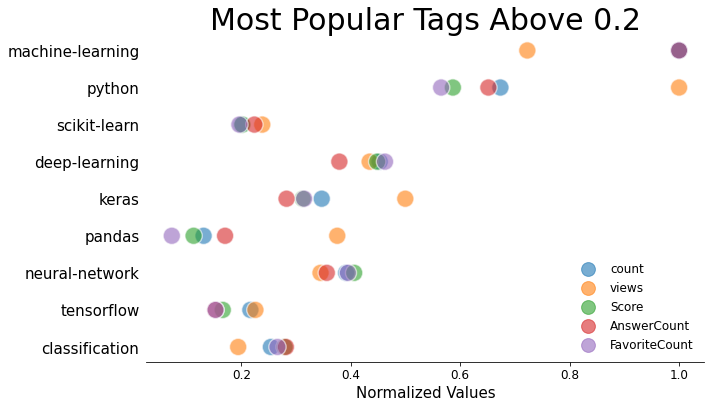

In [30]:
# filter to only include tags with vals above .20
above20_melted = top_melted[top_melted['value'] >= 0.2]

# keep only unique tags
above20_list = list(above20_melted['tag'].unique())

# filter ab
above20_tags = top_melted[top_melted['tag'].isin(above20_list)]

# create a plot
fig, ax = plt.subplots(figsize = (10,6))
ax = sns.scatterplot(
                     data = above20_tags,
                     x = 'value',
                     y = 'tag',
                     hue = 'variable',
                     s = 300,
                     alpha = 0.6
                     )

ax.set_title('Most Popular Tags Above 0.2', fontsize = 30)
ax.set_xlabel('Normalized Values', fontsize = 15)
ax.set_ylabel(None)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 15)
ax.tick_params(left = False)

leg = ax.legend(loc = 4, fontsize = 12, frameon = False, markerscale = 2.3)
#set alpha of legend
for lh in leg.legendHandles: 
    lh.set_alpha(0.6)

sns.despine(left=True)
plt.show()

Below is a list of tags that should be in the minimum consideration set when selecting topics that are popular:
* machine-learning
* python
* scikit-learn
* deep learning
* keras
* pandas
* neural-network
* tensorflow
* classification

Any opportunity to overlap tags, where appropriate, should be taken advantage of. For example, if we're writing an article about machine learning with Python using the scikit-learn python library, we should include all those tags. Focusing our writers efforts on articles or posts with the most overlap of these high performing tags should be prioritized.

One last cut we will take is taking the average engagement for tags. We will attempt to find this out by dividing each metric's sum, apart from count, and divide it by count for each tag. This will let us now, on average, how posts with those tags perform.

In [31]:
# create an empty dataframe of just our tags
average_engagement_per_post = combined_metric_df
average_engagement_per_post = average_engagement_per_post.iloc[:,:1]
average_engagement_per_post

,tag
0,machine-learning
1,data-mining
2,regression
3,linear-regression
4,regularization
...,...
521,encoder
522,label-smoothing
523,label-flipping
524,3d-object-detection


In [32]:
# isolate our engagement metrics
eng_metrics = ['views', 'Score','AnswerCount','FavoriteCount']

# set chained assignment to ignore incorrect flag
pd.options.mode.chained_assignment = None

#loop through each metric and divide the series in the dataframe matching that metric and divide by count
for metric in metrics:
    average_engagement_per_post[metric] = combined_metric_df[metric] / combined_metric_df['count']
    
# reset chained assignment to pick up future flags
pd.options.mode.chained_assignment = "raise"

# drop the count row since they all equal 1
average_engagement_per_post.drop(['count'], axis = 1)

# show the dataframe
average_engagement_per_post

,tag,count,views,Score,AnswerCount,FavoriteCount
0,machine-learning,1.0,144.262532,0.933903,0.858893,0.213517
1,data-mining,1.0,143.115207,0.857143,0.843318,0.142857
2,regression,1.0,142.510086,0.798271,0.890490,0.135447
3,linear-regression,1.0,108.445714,0.914286,1.154286,0.217143
4,regularization,1.0,98.820000,1.040000,0.780000,0.100000
...,...,...,...,...,...,...
521,encoder,1.0,16.000000,1.000000,1.000000,0.000000
522,label-smoothing,1.0,480.000000,0.000000,1.000000,1.000000
523,label-flipping,1.0,480.000000,0.000000,1.000000,1.000000
524,3d-object-detection,1.0,7.000000,0.000000,0.000000,0.000000


Next, for each metric, we will capture that metrics top 20 highest tags and save them to a comined dataframe.

In [33]:
# create an empty dictionary to lists of top values for each metric
top_tag_names_engagement = []
# create a list to use as reference in for loop
metrics = ['views', 'Score','AnswerCount','FavoriteCount']
#loop through each metric
for metric in metrics:
    # take the top 20 tag names of that metric as a list from the combined dataframe
    top20tags = list(average_engagement_per_post.sort_values(by =[metric], ascending = False).head(20)['tag'])
    # append the list to the top tag names list
    top_tag_names_engagement.append(top20tags)

    
# create an empty list to store unique names
unique_top_tags_engagement = []
# loop over each list in the tag names list
for ls in top_tag_names_engagement:
    # loop over each tag in each list
    for tag in ls:
        # append the tag to unique tag names list if not in list
        if tag not in unique_top_tags:
            unique_top_tags_engagement.append(tag)
            
# create a filtered dataframe that only contains tag names in our list but every metric is included
top_combined_eng_df = average_engagement_per_post[average_engagement_per_post['tag'].isin(unique_top_tags)]


# Show the final dataframe
top_combined_eng_df.sort_values(by = 'views', ascending = False)

,tag,count,views,Score,AnswerCount,FavoriteCount
149,csv,1.0,1431.629630,0.814815,1.074074,0.259259
86,dataframe,1.0,1103.111111,0.641975,1.135802,0.123457
31,pandas,1.0,570.019774,0.799435,1.112994,0.118644
32,numpy,1.0,425.358974,0.786325,0.726496,0.128205
5,python,1.0,296.353363,0.813120,0.830761,0.179162
22,keras,1.0,287.281283,0.839572,0.699465,0.193583
9,scikit-learn,1.0,237.240741,0.938889,0.959259,0.209259
83,pytorch,1.0,229.942857,0.754286,0.474286,0.194286
45,tensorflow,1.0,207.823630,0.714041,0.604452,0.150685
21,deep-learning,1.0,191.498361,0.923770,0.718852,0.218033


We now have a dataframe that has the average engagement for tags per post. This is helpful additional context that tells us not only what volume tags get in aggregate, which is what our previous data visualization told us, but what we can expect on average for a single post containing these tags.

## Highly Engaging and Highly Popular

Let's see if there's overlap between high average engagement tags and highly popular tags.

In [34]:
popular_and_engaging = top_combined_eng_df[top_combined_eng_df['tag'].isin(above20_list)].reset_index()

print(popular_and_engaging['tag'])

0    machine-learning
1              python
2        scikit-learn
3       deep-learning
4               keras
5              pandas
6      neural-network
7          tensorflow
8      classification
Name: tag, dtype: object


All of the popular tags with a normalized engagement metric above 0.2 can be found in the dataframe of highly engaging tags.

## Conclusion

The purpose of this analysis was to determine the type of data science content we should write about in order to create popular posts. We approached this problem by answering two questions about the tag data that we exported out of the Data Science Stack Exchange Website. Specifically, which tags have a high volume of usage based on a normalized aggregation of engagement metrics, and which tags have a high level of engagement on average for a single post.

Our recommendation is to focus on the **highly popular and highly engaging** tags to start. We have provided a shortlist of 9 tags that meet both criteria.

**Overlapping tags should be prioritized** where relevant. i.e. an article on machine learning using python, pandas and scikit learn has 3 of the 9 most popular and highly engaging tags and all three should be used.

**Niche, or less talked about, content can perform just as well** if not better than those that are popular topics. As the content team needs topics beyond the top 9 listed above, we recommend experimenting with more niche, lower visibility but more engagedwith tags to see how they compare. An expanded overlap list can be provided upon request.